## LAB 6
## CS22B2020
## G.SriRam

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if the covariance matrix falls under Case 1
def isCase1(mat):
    first = mat[0][0]
    for i in range(1, len(mat)):
        if mat[i][i] != first:
            return False
    return True

# Function to compute the discriminant function for Case 1
def linear_case1(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)  # Compute the mean of the data points
    cov = cov_mat[0][0]  # Extract the covariance value
    weight = u1 / cov  # Compute the weight vector
    bias = np.log(pw) - 0.5 * np.dot(u1.T, u1) / (cov ** 2)  # Compute the bias term
    return weight, bias

# Function to compute the discriminant function for Case 2
def linear_case2(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)  # Compute the mean of the data points
    inv_cov = np.linalg.inv(cov_mat)  # Compute the inverse of the covariance matrix
    weight = inv_cov @ u1  # Compute the weight vector
    bias = np.log(pw) - 0.5 * u1.T @ inv_cov @ u1  # Compute the bias term
    return weight, bias

# Function to compute the discriminant function for Case 3 (non-linear)
def non_linear(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)  # Compute the mean of the data points
    inv_cov = np.linalg.inv(cov_mat)  # Compute the inverse of the covariance matrix
    weight1 = -0.5 * inv_cov  # Compute the quadratic term weight matrix
    weight2 = inv_cov @ u1  # Compute the linear term weight vector
    bias = np.log(pw) - 0.5 * np.log(np.linalg.det(cov_mat)) - 0.5 * u1.T @ inv_cov @ u1  # Compute the bias term
    return weight1, weight2, bias

# Function to classify the data points using Bayes classifier and determine the decision boundary
def bayes_classifier(w1, w2, pw1, pw2):
    w1_cov = np.cov(w1, rowvar=False)  # Compute the covariance matrix for class ω1
    w2_cov = np.cov(w2, rowvar=False)  # Compute the covariance matrix for class ω2

    # Check if the covariance matrices are equal (Case 2)
    if np.allclose(w1_cov, w2_cov):
        weight1, bias1 = linear_case2(w1, pw1, w1_cov)
        weight2, bias2 = linear_case2(w2, pw2, w2_cov)
        w = weight1 - weight2  # Compute the weight difference
        b = bias1 - bias2  # Compute the bias difference
        x_min = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1  # Determine the minimum x value for plotting
        x_max = max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1  # Determine the maximum x value for plotting
        x_values = np.linspace(x_min, x_max, 100)  # Generate x values for plotting
        y_values = -(w[0] * x_values + b) / w[1]  # Compute the corresponding y values for the decision boundary
        return x_values, y_values

    # Check if the covariance matrices fall under Case 1
    elif isCase1(w1_cov) and isCase1(w2_cov):
        weight1, bias1 = linear_case1(w1, pw1, w1_cov)
        weight2, bias2 = linear_case1(w2, pw2, w2_cov)
        w = weight1 - weight2  # Compute the weight difference
        b = bias1 - bias2  # Compute the bias difference
        x_min = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1  # Determine the minimum x value for plotting
        x_max = max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1  # Determine the maximum x value for plotting
        x_values = np.linspace(x_min, x_max, 100)  # Generate x values for plotting
        y_values = -(w[0] * x_values + b) / w[1]  # Compute the corresponding y values for the decision boundary
        return x_values, y_values

    # If the covariance matrices fall under Case 3 (non-linear)
    else:
        weight1_1, weight1_2, bias1 = non_linear(w1, pw1, w1_cov)
        weight2_1, weight2_2, bias2 = non_linear(w2, pw2, w2_cov)
        x_min, x_max = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1, max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1  # Determine the x range for plotting
        y_min, y_max = min(np.min(w1[:, 1]), np.min(w2[:, 1])) - 1, max(np.max(w1[:, 1]), np.max(w2[:, 1])) + 1  # Determine the y range for plotting
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # Create a meshgrid for plotting
        grid_points = np.c_[xx.ravel(), yy.ravel()]  # Flatten the meshgrid points
        g1_values = np.array([point.T @ weight1_1 @ point + weight1_2.T @ point + bias1 for point in grid_points])  # Compute the discriminant function values for class ω1
        g2_values = np.array([point.T @ weight2_1 @ point + weight2_2.T @ point + bias2 for point in grid_points])  # Compute the discriminant function values for class ω2
        g1_values = g1_values.reshape(xx.shape)  # Reshape the discriminant function values to match the meshgrid
        g2_values = g2_values.reshape(xx.shape)  # Reshape the discriminant function values to match the meshgrid
        return xx, yy, g1_values, g2_values

# Function to plot the decision boundary between two classes
def find_boundary(w1, w2, pw1, pw2):
    plt.figure(figsize=(10, 10))
    plt.scatter(w1[:, 0], w1[:, 1], color='blue', label='ω1')  # Plot the data points for class ω1
    plt.scatter(w2[:, 0], w2[:, 1], color='red', label='ω2')  # Plot the data points for class ω2
    result = bayes_classifier(w1, w2, pw1, pw2)  # Get the decision boundary result from the Bayes classifier
    if isinstance(result, tuple) and len(result) == 2:
        x_values, y_values = result
        plt.plot(x_values, y_values, color='green', label='Decision Boundary')  # Plot the decision boundary for linear cases
    else:
        xx, yy, g1_values, g2_values = result
        plt.contour(xx, yy, g1_values - g2_values, levels=[0], colors='green')  # Plot the decision boundary for non-linear case
    plt.title("Decision Boundary between w1 and w2")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

1.Find and plot the decision boundary between class ω1 and ω2. <br>Assume P(ω1) = P(ω2).<br>
```
ω1 = [1,6; 3,4; 3,8; 5,6]
ω2 = [3,0; 1,-2;3,-4;5,-2]
```



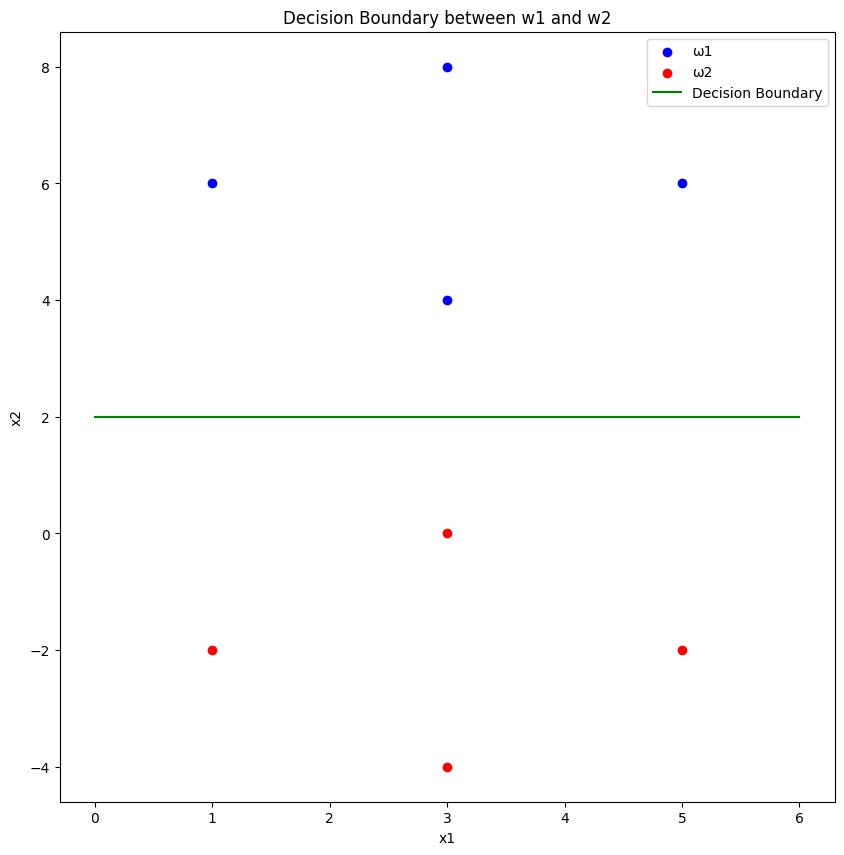

In [7]:
# Question 1
w1_q1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
w2_q1 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
pw1_q1 = 0.5
pw2_q1 = 0.5
find_boundary(w1_q1, w2_q1, pw1_q1, pw2_q1)

Find and plot the decision boundary between class ω1 and ω2. <br>Assume P(ω1) =0.3; P(ω2)=0.7<br>
```
ω1 = [1,-1; 2,-5; 3,-6; 4,-10; 5,-12; 6,-15]
ω2 = [-1,1; -2,5; -3,6; -4,10, -5,12; -6, 15]



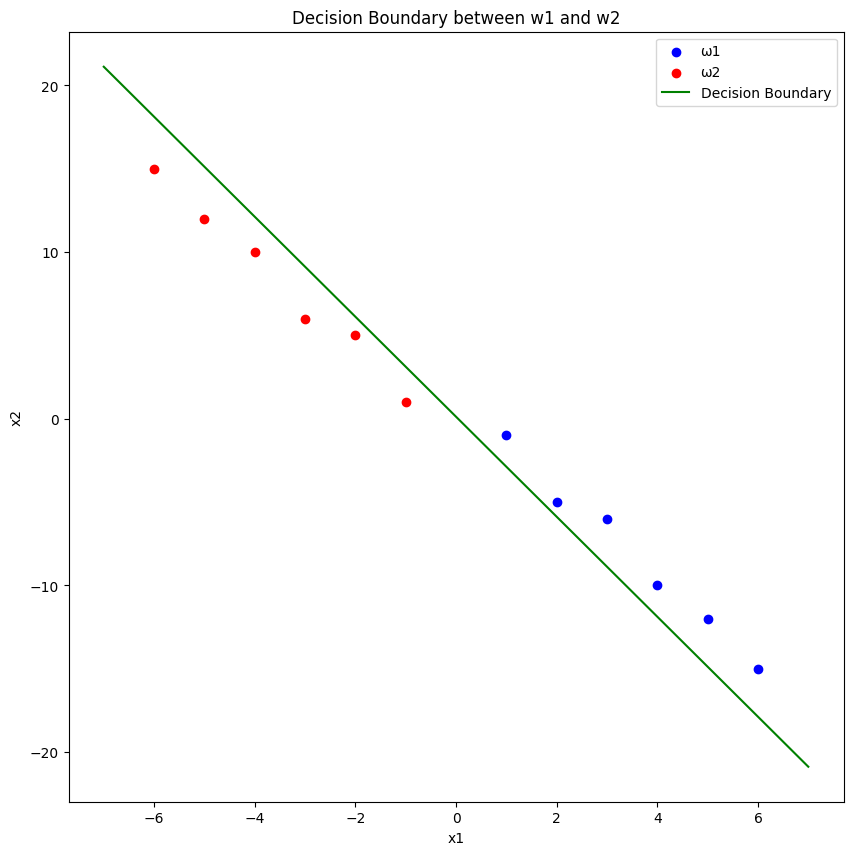

In [8]:
# Question 2
w1_q2 = np.array([[1, -1], [2, -5], [3, -6], [4, -10], [5, -12], [6, -15]])
w2_q2 = np.array([[-1, 1], [-2, 5], [-3, 6], [-4, 10], [-5, 12], [-6, 15]])
pw1_q2 = 0.3
pw2_q2 = 0.7
find_boundary(w1_q2, w2_q2, pw1_q2, pw2_q2)


Find and plot the decision boundary between class ω1 and ω2.<br> Assume P(ω1) = P(ω2).<br>
```
ω1 = [2,6; 3,4; 3,8; 4,6]
ω2 = [3,0; 1,-2; 3,-4; 5,-2]
```

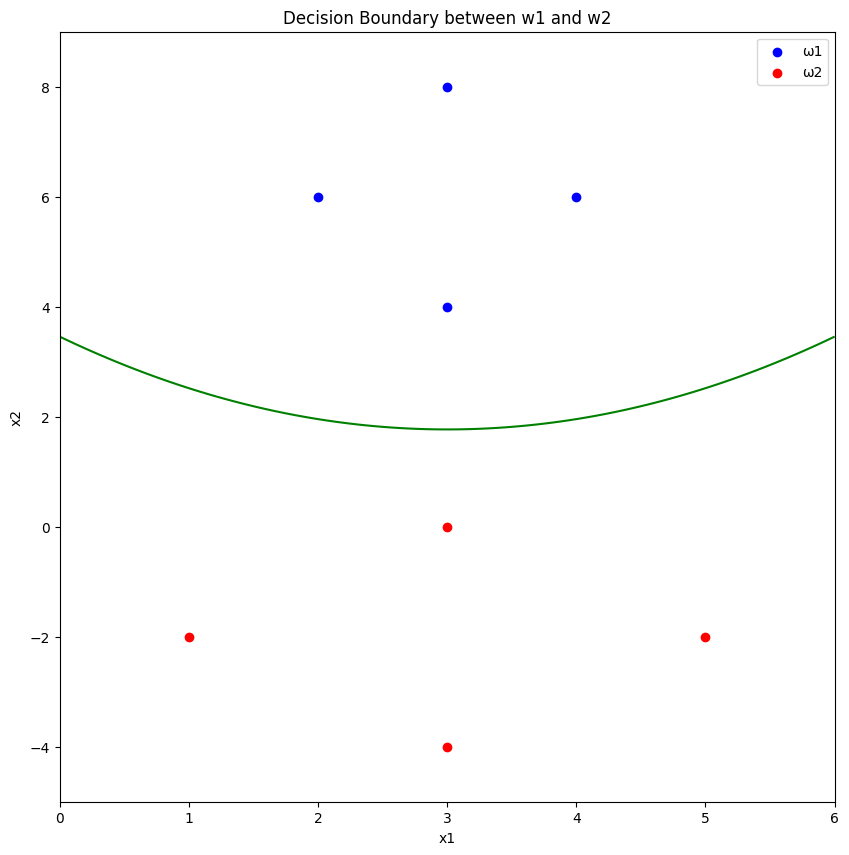

In [9]:
# Question 3
w1_q3 = np.array([[2, 6], [3, 4], [3, 8], [4, 6]])
w2_q3 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
pw1_q3 = 0.5
pw2_q3 = 0.5
find_boundary(w1_q3, w2_q3, pw1_q3, pw2_q3)

## Question 4
## Bayes Classifier for Iris Dataset

**Dataset Specifications:**
- Total number of samples = 150
- Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)
- Number of samples in each class = 50
- Number of dimensions = 4
- Feature vector = `<sepal length, sepal width, petal length, petal width>`

### Task:
1. Use only two features: `Petal Length` and `Petal Width` for 3-class classification and implement a **Bayes Classifier**.
2. Divide the dataset as follows:
   - **Training set:** First 40 samples in each class.
   - **Test set:** Remaining 10 samples in each class.
3. Draw the **decision boundary** between the three classes using these two features.
4. Visualize the decision regions corresponding to the three classes (2D, 3 regions) for a multi-class classification problem.


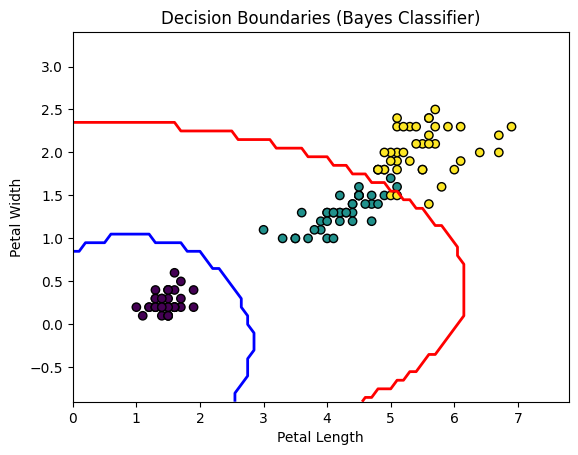

Accuracy of the Bayes Classifier: 96.66666666666667%


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate mean and variance for each class
def calculate_mean_variance(training_df, labels, n):
    mean = np.zeros((n, training_df.shape[1]))
    var = np.zeros((n, training_df.shape[1]))

    for i in range(n):
        classi = training_df[labels == i]
        mean[i, :] = np.mean(classi, axis=0)
        var[i, :] = np.var(classi, axis=0)

    return mean, var

# Function to calculate Gaussian probability
def gaussian_probability(x, mean, var):
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent

# Bayes classifier
def bayes_classifier(X, mean, var, n):
    pw = 1 / n
    prob = np.zeros((X.shape[0], n))

    for i in range(n):
        likelihood = gaussian_probability(X, mean[i], var[i]).prod(axis=1)
        prob[:, i] = likelihood * pw

    return np.argmax(prob, axis=1)

# Load iris dataset
iris_df = pd.read_csv('/content/iris.csv')

# Only two features
iris_df = iris_df[['PetalLengthCm', 'PetalWidthCm', 'Species']]

# Testing data: First 10 samples of each variety
test_df = []
for class_label in iris_df['Species'].unique():
    sample = iris_df[iris_df['Species'] == class_label].head(10)
    test_df.append(sample)

test_df = pd.concat(test_df)

n = 3
# Dropping testing dataset
training_df = iris_df.drop(test_df.index)

# Mapping species to integers: 'setosa' -> 0, 'versicolor' -> 1, 'virginica' -> 2
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
labels = training_df['Species'].map(species_map).values
training_df.drop(columns=['Species'], inplace=True)

# Calculating mean and variance for training data
mean, var = calculate_mean_variance(training_df, labels, n)

# For plotting decision boundaries
x_min, x_max = training_df.iloc[:, 0].min() - 1, training_df.iloc[:, 0].max() + 1
y_min, y_max = training_df.iloc[:, 1].min() - 1, training_df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Classifying the grid points
result = bayes_classifier(grid, mean, var, n)
result = result.reshape(xx.shape)

# Plotting decision boundaries
plt.contour(xx, yy, result, levels=[0.5, 1.5], colors=['blue', 'red'], linewidths=2)
plt.scatter(training_df.iloc[:, 0], training_df.iloc[:, 1], c=labels, edgecolor='k', marker='o')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundaries (Bayes Classifier)')
plt.show()

# Mapping the test labels to integers for comparison
test_labels = test_df['Species'].map(species_map).values

# Dropping the 'Species' column from the test data, keeping only the features
test_features = test_df.drop(columns=['Species']).values

# Classifying the test data
test_predictions = bayes_classifier(test_features, mean, var, n)

# Calculating accuracy
accuracy = np.mean(test_predictions == test_labels) * 100
print(f'Accuracy of the Bayes Classifier: {accuracy}%')

## Classifier for "face feature vectors.csv" Dataset

**Dataset Specifications:**
- Total number of samples = 800
- Number of classes = 2 (labeled as "male" and "female")
- Samples from `1 to 400` belong to class "male"
- Samples from `401 to 800` belong to class "female"
- Number of samples per class = 400
- Number of dimensions = 128 (each sample is a 128-dimensional feature vector)

### Task:
1. **Training Set:**
   - Use the first **395 samples** from each class as the training set:
     - Samples `1 to 395` for "male"
     - Samples `401 to 795` for "female"
  
2. **Test Set:**
   - Use the **last 5 samples** from each class as the test set:
     - Samples `396 to 400` for "male"
     - Samples `796 to 800` for "female"
  
3. Design and implement a **classifier** using this dataset.

4. Evaluate the classifier using the test samples.


In [27]:
import numpy as np
import pandas as pd

# Function to calculate mean and variance for each class
def calculate_mean_variance(training_df, labels, n):
    mean = np.zeros((n, training_df.shape[1]))
    var = np.zeros((n, training_df.shape[1]))

    for i in range(n):
        classi = training_df[labels == i]
        mean[i, :] = np.mean(classi, axis=0)
        var[i, :] = np.var(classi, axis=0)

    return mean, var

# Function to calculate Gaussian probability
def gaussian_probability(x, mean, var):
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent

# Bayes classifier
def bayes_classifier(X, mean, var, n):
    pw = 1 / n
    prob = np.zeros((X.shape[0], n))

    for i in range(n):
        likelihood = gaussian_probability(X, mean[i], var[i]).prod(axis=1)
        prob[:, i] = likelihood * pw

    return np.argmax(prob, axis=1)

# Load face feature vectors dataset
face_df = pd.read_csv('/content/face_feature_vectors.csv')

# Number of classes
n = 2

# Number of features
features = 128

# Labels: first 400 are male (0), next 400 are female (1)
labels = np.array([0] * 400 + [1] * 400)

# Testing dataset: last 5 samples of each class
test_df = pd.concat([face_df.iloc[395:400], face_df.iloc[795:800]])
test_df.drop(columns=['Unnamed: 1'], inplace=True)
test_labels = np.concatenate((labels[395:400], labels[795:800]))

# Training dataset: remaining samples
training_df = pd.concat([face_df.iloc[:395], face_df.iloc[400:795]])
training_df.drop(columns=['Unnamed: 1'], inplace=True)
train_labels = np.concatenate((labels[:395], labels[400:795]))

# Calculate mean and variance for training data
mean, var = calculate_mean_variance(training_df.values, train_labels, n)

# Classify training data
train_pred = bayes_classifier(training_df.values, mean, var, n)
train_accuracy = np.mean(train_pred == train_labels) * 100
print(f"Training Accuracy: {train_accuracy}%")

# Classify test data
test_pred = bayes_classifier(test_df.values, mean, var, n)
test_accuracy = np.mean(test_pred == test_labels) * 100
print(f"Test Accuracy: {test_accuracy}%")

Training Accuracy: 98.60759493670886%
Test Accuracy: 100.0%
